# Intro to Data Manipulation and Pandas
**Dan Tamayo**

*Material draws from a [blog](http://www.ultravioletanalytics.com/2014/10/30/kaggle-titanic-competition-part-i-intro/) working through the Titanic dataset by Dave Novelli, as well as the [Pandas Cookbook](http://pandas.pydata.org/pandas-docs/stable/tutorials.html) by Julia Evans*


# Follow Along

In a terminal, navigate to the directory where you want to add the MachineLearning folder.  Then

    cd /path/to/MachineLearning
    git pull
    cd Day2
    source activate ml
    jupyter notebook TitanicPandas.ipynb

# Loading a Dataset

In [1]:
import pandas as pd
import numpy as np

!wget "https://www.dropbox.com/s/u6ghgwxphcyk8vj/train.csv"
df = pd.read_csv("./train.csv",  error_bad_lines=False)

--2018-11-30 18:06:47--  https://www.dropbox.com/s/u6ghgwxphcyk8vj/train.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.1, 2620:100:6025:1::a27d:4501
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/u6ghgwxphcyk8vj/train.csv [following]
--2018-11-30 18:06:53--  https://www.dropbox.com/s/raw/u6ghgwxphcyk8vj/train.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc79dd3d2cd048fb3471e47ba990.dl.dropboxusercontent.com/cd/0/inline/AWkxzcZJg7wlzOV5F8R5MrloSDf8cA_caFl2pFDmn9xsT1SX9ybCcRrRhu0xd4y0693hjgfgS3qgkCIxcxEx6m9OHvGukMLUeEcTn0ogtvY_I9Y8toA-Y9qwmmXPurSBuahzuzjweA5Tru6V--v74D3rPD8OY0YL2D3XP5vK3erH2rZ0Tcq5D6WXt8SNp5qMZHo/file [following]
--2018-11-30 18:06:54--  https://uc79dd3d2cd048fb3471e47ba990.dl.dropboxusercontent.com/cd/0/inline/AWkxzcZJg7wlzOV5F8R5MrloSDf8cA_caFl2pFDmn9xsT1SX9ybCcRrRh

In [2]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [4]:
df.shape

(891, 12)

# Magic Pandas

# Selecting Columns

In [5]:
df['Fare'].head()

0     7.2500
1    71.2833
2     7.9250
3    53.1000
4     8.0500
Name: Fare, dtype: float64

In [6]:
df[['Fare', 'Sex']].head()

,Fare,Sex
0,7.2500,male
1,71.2833,female
2,7.9250,female
3,53.1000,female
4,8.0500,male


# Data at a glance

In [44]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,EmbarkedNum,Female
count,891.000000,891.000000,891.000000,8.910000e+02,891.000000,891.000000,8.910000e+02,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,2.232906e-16,0.523008,0.381594,3.987333e-18,0.188552,0.086420,0.725028,0.361392,0.352413
std,257.353842,0.486592,0.836071,1.000562e+00,1.102743,0.806057,1.000562e+00,0.391372,0.281141,0.446751,0.635673,0.477990
min,1.000000,0.000000,1.000000,-2.253155e+00,0.000000,0.000000,-6.484217e-01,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,-5.924806e-01,0.000000,0.000000,-4.891482e-01,0.000000,0.000000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,0.000000e+00,0.000000,0.000000,-3.573909e-01,0.000000,0.000000,1.000000,0.000000,0.000000
75%,668.500000,1.000000,3.000000,4.079260e-01,1.000000,0.000000,-2.424635e-02,0.000000,0.000000,1.000000,1.000000,1.000000
max,891.000000,1.000000,3.000000,3.870872e+00,8.000000,6.000000,9.667167e+00,1.000000,1.000000,1.000000,2.000000,1.000000


In [7]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [8]:
df['Age'].median()

28.0

# Plotting

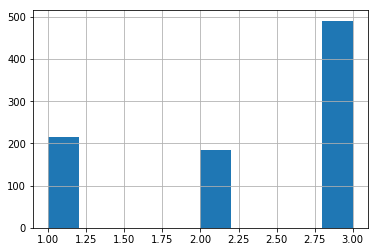

In [9]:
%matplotlib inline
import seaborn
fig = df['Pclass'].hist()

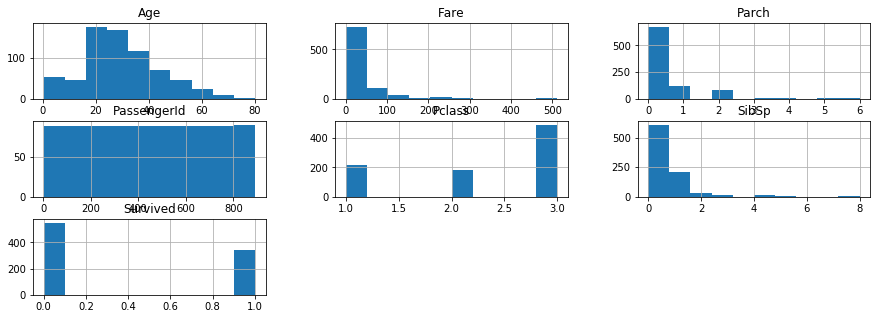

In [10]:
fig = df.hist(figsize=(15,5))

# Filtering

In [11]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Boolean Masks

In [12]:
mask = df['Embarked'] == 'C'
mask.head()

0    False
1     True
2    False
3    False
4    False
Name: Embarked, dtype: bool

# Filtering Dataframes

In [13]:
df_filter = df[mask] # df_filter = df[df['Embarked'] == 'C']
df_filter.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C


# Memory Issues

In [14]:
df_filter = df.loc[df['Embarked'] == 'C']
df_filter.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C


# Selecting specific columns

df.loc[criterion, columns]

In [15]:
test = df.loc[df['Age'] > 30., ['Age', 'Fare', 'Sex']]
test.head()

,Age,Fare,Sex
1,38.0,71.2833,female
3,35.0,53.1000,female
4,35.0,8.0500,male
6,54.0,51.8625,male
11,58.0,26.5500,female


# Combining criteria / columns

In [16]:
test = df.loc[(df['Age'] > 30.) & (df['Fare'] < 50.), 'Age':'Fare']
test.head()

,Age,SibSp,Parch,Ticket,Fare
4,35.0,0,0,373450,8.050
11,58.0,0,0,113783,26.550
13,39.0,1,5,347082,31.275
15,55.0,0,0,248706,16.000
18,31.0,1,0,345763,18.000


# Requirements for working with data in scikit-learn

1. Features should not have missing values
2. Features and response should be numeric
3. Features and response should be NumPy arrays
4. Features and response are separate objects
5. Features and response should have specific shapes

# Requirements for working with data in scikit-learn

1. **Features should not have missing values**
2. Features and response should be numeric
3. Features and response should be NumPy arrays
4. Features and response are separate objects
5. Features and response should have specific shapes

# How to Find Valid Values

In [17]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Wrong way:

In [18]:
import numpy as np
df[df['Cabin']!=np.nan]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Right Way:

In [19]:
df.loc[df['Cabin'].notnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C


# Approach 1:  Throw out any rows with missing data values

In [20]:
df.notnull().head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,True,True,True,True,True,True,True,True,True,True,False,True
1,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,False,True
3,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,False,True


In [21]:
df_filter = df.loc[df.notnull().all(axis=1)]

# How much data is left?

In [22]:
df_filter.shape

(183, 12)

# Approach 2:  Assign missing identifier

In [23]:
df.loc[df['Cabin'].isnull(), 'Cabin'] = 'U0'
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


# Approach 3: Assign the average/median/mode value

In [24]:
df.loc[df['Fare'].isnull()].shape

(0, 12)

In [25]:
df['Fare'].median()

14.4542

In [26]:
df.loc[df['Fare'].isnull(), 'Fare'] = df['Fare'].median()

# Categorical Variables

In [27]:
df.loc[df['Embarked'].isnull()].shape

(2, 12)

In [28]:
df['Embarked'].mode()

0    S
dtype: object

In [29]:
df['Embarked'].mode()[0]

'S'

In [30]:
df.loc[df['Embarked'].isnull(), 'Embarked'] = df['Embarked'].dropna().mode()[0]

# Approach 4: Fit a regression model to predict missing values

In [31]:
for col in df.columns:
    print("NaNs in column {0} = {1}".format(col, df.loc[df[col].isnull()].shape[0]))

NaNs in column PassengerId = 0
NaNs in column Survived = 0
NaNs in column Pclass = 0
NaNs in column Name = 0
NaNs in column Sex = 0
NaNs in column Age = 177
NaNs in column SibSp = 0
NaNs in column Parch = 0
NaNs in column Ticket = 0
NaNs in column Fare = 0
NaNs in column Cabin = 0
NaNs in column Embarked = 0


In [32]:
df.loc[df['Age'].isnull(), 'Age'] = df['Age'].mean()

# Requirements for working with data in scikit-learn

1. Features should not have missing values
2. **Features and response should be numeric**
3. Features and response should be NumPy arrays
4. Features and response are separate objects
5. Features and response should have specific shapes

In [33]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


# Approach 1:  Creating Dummy (Binary) Variables

In [34]:
print(df['Embarked'].unique())

['S' 'C' 'Q']


In [35]:
dummies_df = pd.get_dummies(df['Embarked'])
dummies_df.head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [36]:
def addEmbarked(name):
    return 'Embarked_' + name
dummies_df = dummies_df.rename(columns=addEmbarked)
dummies_df.head()

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [37]:
df = pd.concat([df, dummies_df], axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S,0,0,1


# Approach 2: Factorizing (Make single multi-class feature)

In [38]:
df['EmbarkedNum'] = pd.factorize(df['Embarked'])[0]
df.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_C,Embarked_Q,Embarked_S,EmbarkedNum
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,U0,S,0,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,1,0,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,U0,S,0,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,U0,S,0,0,1,0
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,U0,Q,0,1,0,2


# What are the classes?

In [39]:
pd.factorize(df['Sex'])

(array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
        1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
        1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
        1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
        0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
        1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
        0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
        1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 

In [40]:
df['Female'] = pd.factorize(df['Sex'])[0]
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_C,Embarked_Q,Embarked_S,EmbarkedNum,Female
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,1,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S,0,0,1,0,0


# Continuous Features: Feature Scaling

![Training data](images/04_knn_dataset.png)

In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(df[['Age', 'Fare']]) # .fit(df) to scale all numerical columns
print("Means = {0}".format(scaler.mean_))
print("Stdevs = {0}".format(scaler.scale_))
df[['Age', 'Fare']] = scaler.transform(df[['Age', 'Fare']])
df.head()

Means = [29.69911765 32.20420797]
Stdevs = [12.99471687 49.66553444]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_C,Embarked_Q,Embarked_S,EmbarkedNum,Female
0,1,0,3,"Braund, Mr. Owen Harris",male,-0.592481,1,0,A/5 21171,-0.502445,U0,S,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.638789,1,0,PC 17599,0.786845,C85,C,1,0,0,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,-0.284663,0,0,STON/O2. 3101282,-0.488854,U0,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.407926,1,0,113803,0.420730,C123,S,0,0,1,0,1
4,5,0,3,"Allen, Mr. William Henry",male,0.407926,0,0,373450,-0.486337,U0,S,0,0,1,0,0
